In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!nvidia-smi

Mon May  4 09:25:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13229, done.
remote: Total 13229 (delta 0), reused 0 (delta 0), pack-reused 13229
Receiving objects: 100% (13229/13229), 11.92 MiB | 14.96 MiB/s, done.
Resolving deltas: 100% (9047/9047), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [ ]:
%cd /content/

/content


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /gdrive
!ls /gdrive

'Colab Notebooks'  'Getting started.pdf'   Yolov3


In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /gdrive/Yolov3

backup	generate_train.py  obj.data  obj.names	obj.zip  yolov3_custom.cfg


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /gdrive/Yolov3/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d darknet/data/

Archive:  ../obj.zip
  inflating: darknet/data/obj/000305928f7b43da.jpg  
  inflating: darknet/data/obj/000305928f7b43da.txt  
  inflating: darknet/data/obj/0005451344f10814.jpg  
  inflating: darknet/data/obj/0005451344f10814.txt  
  inflating: darknet/data/obj/0027b445b545ae1c.jpg  
  inflating: darknet/data/obj/0027b445b545ae1c.txt  
  inflating: darknet/data/obj/00329773aa14e3ad.jpg  
  inflating: darknet/data/obj/00329773aa14e3ad.txt  
  inflating: darknet/data/obj/003af63a783a1615.jpg  
  inflating: darknet/data/obj/003af63a783a1615.txt  
  inflating: darknet/data/obj/00459f3bf70283d3.jpg  
  inflating: darknet/data/obj/00459f3bf70283d3.txt  
  inflating: darknet/data/obj/0045a7e07dd4fa0e.jpg  
  inflating: darknet/data/obj/0045a7e07dd4fa0e.txt  
  inflating: darknet/data/obj/004eb6ca27183afe.jpg  
  inflating: darknet/data/obj/004eb6ca27183afe.txt  
  inflating: darknet/data/obj/0065a51ab60e59fe.jpg  
  inflating: darknet/data/obj/0065a51ab60e59fe.txt  
  inflating: darknet/data

In [ ]:
pwd

'/content'

In [ ]:
%cd /content/

/content


In [ ]:
%cd darknet/

/content/darknet


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /gdrive/Yolov3/yolov3_custom.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /gdrive/Yolov3/obj.names ./data

In [ ]:
!cp /gdrive/Yolov3/obj.data  ./data

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /gdrive/Yolov3/generate_train.py ./data

In [ ]:
pwd

'/content/darknet'

In [ ]:
!python data/generate_train.py

In [ ]:
!ls data/

9k.tree     generate_train.py	  imagenet.shortnames.list  openimages.names
coco9k.map  giraffe.jpg		  labels		    person.jpg
coco.names  goal.txt		  obj			    scream.jpg
dog.jpg     horses.jpg		  obj.data		    train.txt
eagle.jpg   imagenet.labels.list  obj.names		    voc.names


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-05-04 06:44:56--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-05-04 06:44:56--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  1.42MB/s    in 2m 14s  

2020-05-04 06:47:12 (1.15 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
pwd

'/content/darknet'

In [ ]:
%cd /content/darknet/

/content/darknet


In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
  

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /gdrive/Yolov3/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000036, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.003562, iou_loss = 0.000000, total_loss = 0.003562 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000008, iou_loss = 0.000000, total_loss = 0.000008 

 3903: 0.226574, 0.159925 avg loss, 0.000010 rate, 2.142293 seconds, 249792 images, 0.189926 hours left
Loaded: 0.000070 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.868731, GIOU: 0.866547), Class: 0.999633, Obj: 0.951527, No Obj: 0.006231, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.009025, iou_loss = 0.037883, total_loss = 0.046908 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 

In [ ]:
imShow('chart.png')

NameError: ignored

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /gdrive/Yolov3/backup/yolov3_custom_4000.weights data/knife1.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

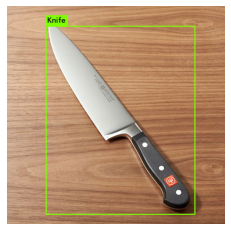

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /gdrive/Yolov3/backup/yolov3_custom_4000.weights data/gun1.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

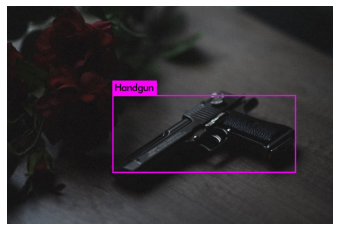

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)